---

### ModelInterface_Examples.ipynb

---

Testing the functionality of the transient_smash package/modules

In [2]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
import transient_smash
from transient_smash.models.model import Model,SinusoidalModelWithNoise

---

Try using one of the pre-defined models - SinusoidalModelWithNoise()

$$ \mathrm{y = A \sin(2\pi fx + \phi) + b + noise}$$

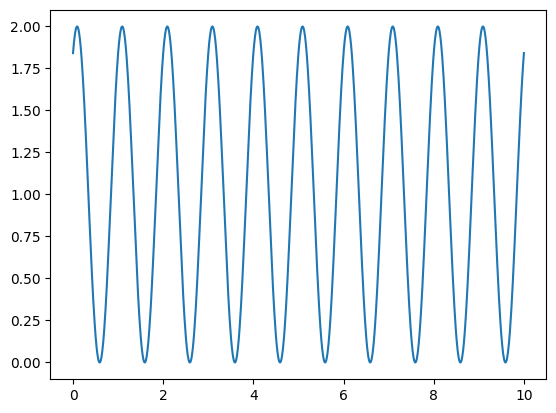

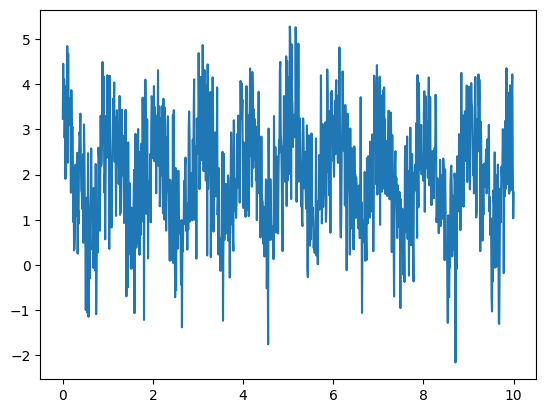

In [8]:
x = np.linspace(0,10,1000)
noiseless_params = [1,1,1,1,0,0]# single (A, f, phi, b, noise_mean, noise_std)
noisy_params = [1,1,1,1,1,1]

obs = SinusoidalModelWithNoise().evaluate(x,noiseless_params)

plt.figure()
plt.plot(x,obs)
plt.show()

obs = SinusoidalModelWithNoise().evaluate(x,noisy_params)

plt.figure()
plt.plot(x,obs)
plt.show()

In [3]:
plt.figure()
plt.plot(x,obs)
plt.show()

NameError: name 'x' is not defined

<Figure size 640x480 with 0 Axes>

---

Try generating a new type of model - Building on the Model() base class

In [ ]:
### Setting up a new type of model using the Model() base class
class GaussianSignalModel(Model):
    
    def evaluate(self, x, gauss, baseline,
                 noise=0):
        if 'period' in gauss.keys():
            current_loc = gauss['x_centre']-50*gauss['period']
            signal = np.zeros(len(x))
            while current_loc<2*max(x):
                signal += norm.pdf(x,loc=current_loc,scale=gauss['width'])
                current_loc += gauss['period']
        else:
            signal = norm.pdf(x,loc=gauss['x_centre'],scale=gauss['width'])
        
        return np.ones(len(x))*baseline + signal + noise

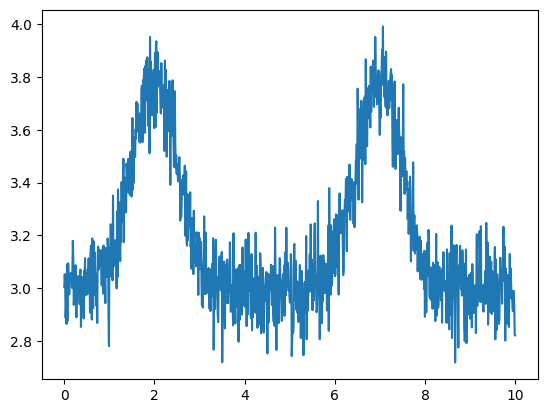

In [36]:
x = np.linspace(0,10,1000)
gauss = {'x_centre':2,
            'width':0.5,
           'period':5}
baseline = 3

obs = GaussianSignalModel().evaluate(x,gauss,baseline,noise=norm.rvs(scale=0.1,size=len(x)))

plt.figure()
plt.plot(x,obs)
plt.show()